# 0 import depedent libraries

In [19]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
# import package(from parent directory)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)
from out_of_sample_test import generate_random_list,mfcf_test
from set_up import *
from markowirtz_networks import *

# 1 out of sample test

## 1.1 Different expected return

In [ ]:
# setting parameter
training_window_list = [30]
testing_window_list = [21]
method_list = ['mean','std','ema','std_o','capm',]
num_iter=100
sample_size = 20
max_clique_size_list = [2,3,5,7,10,15,20]#,50]
#iteration_range_mfcf = np.arange(-0.05,0.05,0.001) # for small scale
iteration_range_mfcf = np.arange(-1,3,0.05) # for large scale
save_result = False

# generate dataset
return_rate_matrix,model_input = generate_nasdaq() 
in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=sample_size)
ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}

for method in method_list:
    for testing_window in testing_window_list:
        sum_var = [] # result list of variance
        sum_ret = [] # result list of return
        for training_window in training_window_list:

            variance_list_sum_mfcf_for_different_clique,return_list_sum_mfcf_for_different_clique=[],[] # result list for this combination of training date, testing date and method
            for max_clique_size in max_clique_size_list:

                ct_control['max_clique_size'] = max_clique_size
                print(ct_control['max_clique_size'])

                variance_list_sum_mfcf,return_list_sum_mfcf = mfcf_test(random_date_list,in_sample_return_matrix_list, 
                                                                    out_sample_return_matrix_list,
                                                                    model_input,iteration_range_mfcf,
                                                                    ct_control=ct_control,training_window =training_window, 
                                                                    testing_window=testing_window,given_return=False,in_sample=False,method=method)
                variance_list_sum_mfcf_for_different_clique.append(variance_list_sum_mfcf)
                return_list_sum_mfcf_for_different_clique.append(return_list_sum_mfcf)
                print('=======================',max_clique_size)

            sum_var.append(variance_list_sum_mfcf_for_different_clique)
            sum_ret.append(return_list_sum_mfcf_for_different_clique)

        sum_var = np.array(sum_var)
        sum_ret = np.array(sum_ret)

        # plotting
        colors = plt.cm.viridis(np.linspace(0, 1, len(max_clique_size_list)))
        lambda_range = iteration_range_mfcf # for small scale # 100 points
        cliuqe_size_list = max_clique_size_list

        for training_index in range(len(sum_var)):
            variance_list_sum_mfcf_for_different_clique, return_list_sum_mfcf_for_different_clique=sum_var[training_index],sum_ret[training_index]
            for i in range(len(variance_list_sum_mfcf_for_different_clique)):
                variance_list_sum_ranged_mfcf = np.mean(variance_list_sum_mfcf_for_different_clique[i], axis=0)
                return_list_sum_ranged_mfcf = np.mean(return_list_sum_mfcf_for_different_clique[i], axis=0)
                sharpe_ratio_sum_ranged_mfcf = [return_list_sum_ranged_mfcf[j]/variance_list_sum_ranged_mfcf[j] for j in range(len(return_list_sum_ranged_mfcf))]
                label = 'max clique size=%d'%cliuqe_size_list[i]
                plt.plot(lambda_range,return_list_sum_ranged_mfcf,label=label,color=colors[i])
            title = 'λ vs var, OUT, training= %s,testing=%d, method=%s,market=nasdaq'% (training_window_list[training_index],testing_window,method)
            plt.title(title)
            plt.xlabel('lambda')
            plt.ylabel('sharpe ratio')
            plt.legend()
            #plt.savefig("%s/%s %s.png"%(directory_path,title,datetime.now().strftime("%Y%m%d_%H%M%S"))) # You can specify the format by changing the file extension (e.g., .pdf, .jpg, .svg)
            plt.show()

        if save_result==True:
            #make directory
            directory_path = 'method=%s,λ vs SR,OUT, testing = %d'%(method,testing_window)
            if not os.path.isdir(directory_path):
                os.makedirs(directory_path)
            # name of file
            title = 'λ vs ret, out of sample_training size = %s,testing size=%d,method=%s'% (str(training_window_list),testing_window,method)
            # Flatten the 4D array to convert it into a 2D array
            flattened_array = sum_var.reshape(-1, sum_var.shape[-1])
            # Save the flattened array to a text file
            np.savetxt('%s/%s sum_var %s.txt'%(directory_path,title,str(sum_var.shape)), flattened_array)
            flattened_array = sum_ret.reshape(-1, sum_ret.shape[-1])
            np.savetxt('%s/%s sum_ret %s.txt'%(directory_path,title,str(sum_ret.shape)), flattened_array)

## 1.2 Different max clique size

### 1.2.1 random sampling

In [ ]:
# setting parameter
training_window = 30
testing_window = 21
method_list = 'std' # method option: 'mean','std','ema','std_o','capm',
method_list
num_iter=100
sample_size = 20
max_clique_size_list = [2,3,5,7,10,15,20]#,50]
#iteration_range_mfcf = np.arange(-0.05,0.05,0.001) # for small scale
iteration_range_mfcf = np.arange(-1,3,0.05) # for large scale
save_result = False
# generate dataset
return_rate_matrix,model_input = generate_nasdaq()
in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=sample_size)

ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}

sum_var = []
sum_ret = []

variance_list_sum_mfcf_for_different_clique,return_list_sum_mfcf_for_different_clique=[],[]
for max_clique_size in max_clique_size_list:
    ct_control['max_clique_size'] = max_clique_size
    print(ct_control['max_clique_size'])

    variance_list_sum_mfcf,return_list_sum_mfcf = mfcf_test(random_date_list,in_sample_return_matrix_list, 
                                                        out_sample_return_matrix_list,
                                                        model_input,iteration_range_mfcf,
                                                        ct_control=ct_control,training_window =training_window, 
                                                        testing_window=testing_window,given_return=False,in_sample=False,method=method)
    variance_list_sum_mfcf_for_different_clique.append(variance_list_sum_mfcf)
    return_list_sum_mfcf_for_different_clique.append(return_list_sum_mfcf)
    print('=======================',max_clique_size)


sum_var = np.array(variance_list_sum_mfcf)
sum_ret = np.array(return_list_sum_mfcf)

colors = plt.cm.viridis(np.linspace(0, 1, len(max_clique_size_list)))
#lambda_range = np.arange(-0.05,0.05,0.002)
lambda_range = iteration_range_mfcf # for small scale #100 points

for i in range(len(variance_list_sum_mfcf_for_different_clique)):
    variance_list_sum_ranged_mfcf = np.mean(variance_list_sum_mfcf_for_different_clique[i], axis=0)
    return_list_sum_ranged_mfcf = np.mean(return_list_sum_mfcf_for_different_clique[i], axis=0)
    sharpe_ratio_sum_ranged_mfcf = [return_list_sum_ranged_mfcf[j]/variance_list_sum_ranged_mfcf[j] for j in range(len(return_list_sum_ranged_mfcf))]
    label = 'max clique size=%d'%max_clique_size_list[i]
    plt.plot(lambda_range,return_list_sum_ranged_mfcf,label=label,color=colors[i])
title = 'λ vs var, OUT, training= %s,testing=%d, method=%s,market=nasdaq'% (training_window_list[tw],testing_window,method)
plt.title(title)
plt.xlabel('lambda')
plt.ylabel('sharpe ratio')
plt.legend()
#plt.savefig("%s/%s %s.png"%(directory_path,title,datetime.now().strftime("%Y%m%d_%H%M%S"))) # You can specify the format by changing the file extension (e.g., .pdf, .jpg, .svg)
plt.show()


if save_result==True:
    #make directory
    directory_path = 'method=%s,λ vs SR,OUT, testing = %d'%(method,testing_window)
    if not os.path.isdir(directory_path):
        os.makedirs(directory_path)
    # name of file
    title = 'λ vs ret, out of sample_training size = %s,testing size=%d,method=%s'% (str(training_window_list),testing_window,method)
    # Flatten the 4D array to convert it into a 2D array
    flattened_array = sum_var.reshape(-1, sum_var.shape[-1])
    # Save the flattened array to a text file
    np.savetxt('%s/%s sum_var %s.txt'%(directory_path,title,str(sum_var.shape)), flattened_array)
    flattened_array = sum_ret.reshape(-1, sum_ret.shape[-1])
    np.savetxt('%s/%s sum_ret %s.txt'%(directory_path,title,str(sum_ret.shape)), flattened_array)

### 1.2.2 Time series

#### different max clique size with lambda = 0.1

In [20]:
def performance_daily(rd_date, in_sample_return_matrix, 
                      out_sample_return_matrix, model_input,
                        lmda,
                        ct_control = None,                 
                        in_sample=False,
                        method='mean'):

    print(rd_date)
    in_sample_mean,cov,adj_matrix = generate_cov_mfcf(in_sample_return_matrix, model_input,
                                                                    rd_date, training_window,
                                                                    ct_control=ct_control,
                                                                    method=method)
    

    mean = np.array(in_sample_mean)
    a = np.ones(len(adj_matrix)).T.dot(adj_matrix.dot(np.ones(len(adj_matrix))))
    b = np.ones(len(adj_matrix)).T.dot(adj_matrix.dot(mean))
    gamma = (1-lmda*b)/a
    optmised_weight = adj_matrix.dot(mean*lmda+gamma*np.ones(len(mean)))
    normalised_weights = optmised_weight / np.sum(optmised_weight)
    weights = np.array(normalised_weights)

    if in_sample==True:
    # out of sample mean and cov(therefore ret and var)
        df = in_sample_return_matrix
    else:
        df = out_sample_return_matrix

    mean =df.mean()*252
    cov = df.cov()*252
    ret = mean.dot(weights)
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))
    return ret, vol

In [ ]:
# daily_performance ——> input(rd_date, in, out, mi, lmda), output(var,ret)
# generate_random_list ——> input(assigned_date, return_m, mi,tw,)
#                          output(in_sample_dict, out_of_sample_dict)
training_window_list = [30]
testing_window_list = [21]
num_iter=100
return_rate_matrix,model_input = generate_nasdaq() 
method = 'std'
n=100
lmda=0.1
max_clique_size_list = [2,3,5,7,10,15,20]#,50]
random_date_assigned = np.arange(model_input['Index'].min(),model_input['Index'].max(),20)
#iteration_range_mfcf = np.arange(-0.05,0.05,0.001) # for small scale
iteration_range_mfcf = np.arange(-1,3,0.05) # for large scale

averages = {}
ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}


for max_clique_size in max_clique_size_list:
    results = {}
    ct_control['max_clique_size'] = max_clique_size
    print('=======================',max_clique_size)

    for _ in range(n): # number of trials
        # generate data for this test
        in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=30,random_date_assigned=random_date_assigned)

        for rd_date in random_date_assigned:
            if (training_window,rd_date) in in_sample_return_matrix_list:
                in_sample_data = in_sample_return_matrix_list[(training_window,rd_date)]
                out_sample_data = out_sample_return_matrix_list[(testing_window,rd_date)]
                try:
                    ret, var = performance_daily(rd_date, in_sample_data, 
                            out_sample_data, model_input,
                                lmda,
                                ct_control = ct_control,                 
                                in_sample=False,
                                method=method)
                
                    if (training_window,testing_window, rd_date) not in results:
                        results[(training_window,testing_window, rd_date)] = {'var': [], 'ret': []}
                    results[(training_window,testing_window, rd_date)]['var'].append(var)
                    results[(training_window,testing_window, rd_date)]['ret'].append(ret)     
                except:
                    pass
    
    for key, values in results.items():
        averages[key[2],max_clique_size] = {
            'avg_var': sum(values['var']) / n,
            'avg_ret': sum(values['ret']) / n
        }  


for max_clique_size in max_clique_size_list:
    print('=======================',max_clique_size)
    ret_result = []
    var_result = []
    date_list = []
    for rd_date in random_date_assigned:
        if (rd_date,max_clique_size) in averages:
            ret_result.append(averages[(rd_date,max_clique_size)]['avg_ret'])
            var_result.append(averages[(rd_date,max_clique_size)]['avg_var'])
            date_list.append(rd_date)
    sharpe_ratio_result = [ret_result[j]/var_result[j] for j in range(len(ret_result))]

    label = 'max clique size=%d'%max_clique_size
    plt.plot(date_list,var_result,label=label)


title = 'sharpe vs time, OUT, ,market=nasdaq'
plt.title(title)
plt.xlabel('time')
#plt.ylabel('var')
plt.ylabel('sharpe ratio')
plt.legend()
#plt.savefig("%s/%s %s.png"%(directory_path,title,datetime.now().strftime("%Y%m%d_%H%M%S"))) # You can specify the format by changing the file extension (e.g., .pdf, .jpg, .svg)
plt.show()

#### lambda = 0.1 with market average return

In [24]:
def market_avg_return(rd_date_list, holding_period = 20):
    return_list = []
    ticker_list = list(model_input['Ticker'].unique())

    for rd_date in rd_date_list:

        # Filter the dataframe for the specific ticker and date range
        mask = (model_input['Index'] >= rd_date) & (model_input['Index'] <= rd_date+holding_period) & (model_input['Ticker'].isin(ticker_list))
        filtered_model_input = model_input.loc[mask]
        if len(filtered_model_input) == 0:
            return_list.append(0)
        else:
            filtered_model_input = filtered_model_input.sort_values(['Ticker', 'Index'])
            # Group by ticker and get the first and last prices
            grouped = filtered_model_input.groupby('Ticker').agg({
                'Close': ['first', 'last']
            })
            # Calculate returns
            grouped['return'] = (grouped[('Close', 'last')] - grouped[('Close', 'first')]) / grouped[('Close', 'first')]
            annualised_return = grouped['return'].mean()
            return_list.append(annualised_return)
    return return_list    

In [85]:
market_return_list = market_avg_return(random_date_assigned, holding_period = 21)
market_return_list = np.array(market_return_list)*252
random_date_assigned = np.arange(model_input['Index'].min(),model_input['Index'].max(),20)
for i in range(len(random_date_assigned)):
    averages[random_date_assigned[i],'market']={'avg_ret':market_return_list[i]}

In [75]:
import pickle

# Load the pickle file
with open('results.pkl', 'rb') as file:
    averages = pickle.load(file)

# Now `data_dict` is your dictionary object loaded from the pickle file
print(averages)

#t = []
#for i in range(len(list(averages.keys()))):
#    t.append(list(averages.keys())[i][0])

max_clique_size_list = [2,5,10,15,20]
#random_date_assigned = list(set(t))

{(1139, 2): {'avg_var': 0.9985833747654962, 'avg_ret': 8.89859820082653}, (1141, 2): {'avg_var': 0.9162620333638788, 'avg_ret': 8.529539567803038}, (1142, 2): {'avg_var': 0.8270549977056143, 'avg_ret': 9.238469451915426}, (1143, 2): {'avg_var': 0.7715007041853397, 'avg_ret': 8.81854472470022}, (1144, 2): {'avg_var': 0.5798086473352697, 'avg_ret': 7.884114479759946}, (1145, 2): {'avg_var': 0.818717443525353, 'avg_ret': 8.180868813477158}, (1147, 2): {'avg_var': 0.69945190306942, 'avg_ret': 6.56586023294372}, (1148, 2): {'avg_var': 1.228830901812358, 'avg_ret': 8.870299816847792}, (1149, 2): {'avg_var': 0.8012511755376555, 'avg_ret': 7.019247803759027}, (1150, 2): {'avg_var': 0.43713988551996275, 'avg_ret': 3.92518760249187}, (1151, 2): {'avg_var': 0.6020805356823771, 'avg_ret': 5.210639218319043}, (1152, 2): {'avg_var': 0.23766323613041837, 'avg_ret': 2.4400522321966824}, (1153, 2): {'avg_var': 1.0830032092055473, 'avg_ret': 6.1536318255467695}, (1154, 2): {'avg_var': 0.5782873974511686

In [91]:

max_clique_size_list = [2,5,10,15,20]

======================= 2
======================= 5
======================= 10
======================= 15
======================= 20


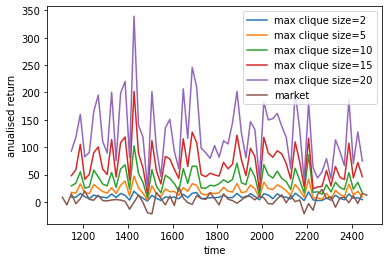

In [92]:
for max_clique_size in max_clique_size_list:
    print('=======================',max_clique_size)
    ret_result = []
    var_result = []
    date_list = []
    for rd_date in random_date_assigned:
        if (rd_date,max_clique_size) in averages:
            ret_result.append(averages[(rd_date,max_clique_size)]['avg_ret'])
            var_result.append(averages[(rd_date,max_clique_size)]['avg_var'])
            date_list.append(rd_date)
    sharpe_ratio_result = [ret_result[j]/var_result[j] for j in range(len(ret_result))]

    label = 'max clique size=%d'%max_clique_size
    plt.plot(date_list,ret_result,label=label)


plt.plot(random_date_assigned,market_return_list,label = 'market')


#title = 'sharpe vs time, OUT, ,market=nasdaq'
#plt.title(title)
plt.xlabel('time')
#plt.ylabel('var')
plt.ylabel('anualised return')
plt.legend()
#plt.savefig("%s/%s %s.png"%(directory_path,title,datetime.now().strftime("%Y%m%d_%H%M%S"))) # You can specify the format by changing the file extension (e.g., .pdf, .jpg, .svg)
plt.show()

#### lambda = 0 with market average return

In [93]:
# daily_performance ——> input(rd_date, in, out, mi, lmda), output(var,ret)
# generate_random_list ——> input(assigned_date, return_m, mi,tw,)
#                          output(in_sample_dict, out_of_sample_dict)
training_window = 30
testing_window = 21
training_window_list = [30]
testing_window_list = [21]
num_iter=100
return_rate_matrix,model_input = generate_nasdaq() 
method = 'std'
lmda=0
max_clique_size_list = [2,5,7,10,15]#,50]
random_date_assigned = np.arange(model_input['Index'].min(),model_input['Index'].max(),20)
#iteration_range_mfcf = np.arange(-0.05,0.05,0.001) # for small scale
iteration_range_mfcf = np.arange(-1,3,0.05) # for large scale

averages = {}
ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}


for max_clique_size in max_clique_size_list:
    results = {}
    ct_control['max_clique_size'] = max_clique_size
    print('=======================',max_clique_size)

    for _ in range(n): # number of trials
        # generate data for this test
        in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=30,random_date_assigned=random_date_assigned)

        for rd_date in random_date_assigned:
            if (training_window,rd_date) in in_sample_return_matrix_list:
                in_sample_data = in_sample_return_matrix_list[(training_window,rd_date)]
                out_sample_data = out_sample_return_matrix_list[(testing_window,rd_date)]
                try:
                    ret, var = performance_daily(rd_date, in_sample_data, 
                            out_sample_data, model_input,
                                lmda,
                                ct_control = ct_control,                 
                                in_sample=False,
                                method=method)
                
                    if (training_window,testing_window, rd_date) not in results:
                        results[(training_window,testing_window, rd_date)] = {'var': [], 'ret': []}
                    results[(training_window,testing_window, rd_date)]['var'].append(var)
                    results[(training_window,testing_window, rd_date)]['ret'].append(ret)     
                except:
                    pass
    
    for key, values in results.items():
        averages[key[2],max_clique_size] = {
            'avg_var': sum(values['var']) / n,
            'avg_ret': sum(values['ret']) / n
        }  



======================= 2
1148
1168
1188
1208
1228
1248
1268
1288
1308
1328
1348
1368
1388
1408
1428
1448
1468
1488
1508
1528
1548
1568
1588
1608
1628
1648
1668
1688
1708
1728
1748
1768
1788
1808
1828
1848
1868
1888
1908
1928
1948
1968
1988
2008
2028
2048
2068
2088
2108
2128
2148
2168
2188
2208
2228
2248
2268
2288
2308
2328
2348
2368
2388
2408
2428
2448
1148
1168
1188
1208
1228
1248
1268
1288
1308
1328
1348
1368
1388
1408
1428
1448
1468
1488
1508
1528
1548
1568
1588
1608
1628
1648
1668
1688
1708
1728
1748
1768
1788
1808
1828
1848
1868
1888
1908
1928
1948
1968
1988
2008
2028
2048
2068
2088
2108
2128
2148
2168
2188
2208
2228
2248
2268
2288
2308
2328
2348
2368
2388
2408
2428
2448
1148
1168
1188
1208
1228
1248
1268
1288
1308
1328
1348
1368
1388
1408
1428
1448
1468
1488
1508
1528
1548
1568
1588
1608
1628
1648
1668
1688
1708
1728
1748
1768
1788
1808
1828
1848
1868
1888
1908
1928
1948
1968
1988
2008
2028
2048
2068
2088
2108
2128
2148
2168
2188
2208
2228
2248
2268
2288
2308
2328
2348
2368
2388

In [ ]:
# Save dictionary to a file
with open('zero_lambda.pkl', 'wb') as file:
    pickle.dump(averages, file)

In [ ]:
for max_clique_size in max_clique_size_list:
    print('=======================',max_clique_size)
    ret_result = []
    var_result = []
    date_list = []
    for rd_date in random_date_assigned:
        if (rd_date,max_clique_size) in averages:
            ret_result.append(averages[(rd_date,max_clique_size)]['avg_ret'])
            var_result.append(averages[(rd_date,max_clique_size)]['avg_var'])
            date_list.append(rd_date)
    sharpe_ratio_result = [ret_result[j]/var_result[j] for j in range(len(ret_result))]

    label = 'max clique size=%d'%max_clique_size
    plt.plot(date_list,ret_result,label=label)


plt.plot(random_date_assigned,market_return_list,label = 'market')


#title = 'sharpe vs time, OUT, ,market=nasdaq'
#plt.title(title)
plt.xlabel('time')
#plt.ylabel('var')
plt.ylabel('anualised return')
plt.legend()
#plt.savefig("%s/%s %s.png"%(directory_path,title,datetime.now().strftime("%Y%m%d_%H%M%S"))) # You can specify the format by changing the file extension (e.g., .pdf, .jpg, .svg)
plt.show()

# 2 Max loss

In [ ]:
def log_transform_sharpe_ratios_2d(sharpe_ratios_2d):

    # Convert input to a numpy array if it is not already
    sharpe_ratios_2d = np.array(sharpe_ratios_2d)
    
    # Apply the log transformation with sign preservation element-wise
    transformed_sharpe_ratios_2d = np.sign(sharpe_ratios_2d) * np.log1p(np.abs(sharpe_ratios_2d))
    
    return transformed_sharpe_ratios_2d

In [ ]:
def max_drawdown_det(rd_date, in_sample_return_matrix, 
                      out_sample_return_matrix, model_input,
                        lmda,training_window = 30,
                        ct_control = None,                 
                        in_sample=False,
                        method='mean'):
    # define sum up list

    print(rd_date)
    in_sample_mean,cov,adj_matrix = generate_cov_mfcf(in_sample_return_matrix, model_input,
                                                                    rd_date, training_window,
                                                                    ct_control=ct_control,
                                                                    method=method)
    

    mean = np.array(in_sample_mean)
    a = np.ones(len(adj_matrix)).T.dot(adj_matrix.dot(np.ones(len(adj_matrix))))
    b = np.ones(len(adj_matrix)).T.dot(adj_matrix.dot(mean))
    #lmda = (mean.mean()-b/a)/(mean.T.dot(adj_matrix.dot(mean))-b**2/a)
    #lmda = lambda
    gamma = (1-lmda*b)/a
    optmised_weight = adj_matrix.dot(mean*lmda+gamma*np.ones(len(mean)))
    normalised_weights = optmised_weight / np.sum(optmised_weight)
    weights = np.array(normalised_weights)

    if in_sample==True:
    # out of sample mean and cov(therefore ret and var)
        df = in_sample_return_matrix
    else:
        df = out_sample_return_matrix

    max_drawdown = np.inf
    # Calculate portfolio returns for each timestamp
    portfolio_returns = np.dot(df, weights)
    max_drawdown = portfolio_returns.min()
    return portfolio_returns
    #print(df)
    #return max_drawdown

In [ ]:
training_window_list = [30]
testing_window_list = [21]
num_iter=100
return_rate_matrix,model_input = generate_nasdaq()

in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=20)

method = 'std'
lmda=0.1
max_clique_size_list = [2,5,7,10,15,20]#,50]
random_date_assigned = np.arange(model_input['Index'].min(),model_input['Index'].max(),20)
#iteration_range_mfcf = np.arange(-0.05,0.05,0.001) # for small scale
iteration_range_mfcf = np.arange(-1,3,0.05) # for large scale
averages = {}
ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}

In [ ]:
raw = {}
for method in method_list:
    for max_clique_size in max_clique_size_list:
        results = {}
        ct_control['max_clique_size'] = max_clique_size
        print('=======================',max_clique_size)

        for _ in range(n): # number of trials
            # generate data for this test
            in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=20,random_date_assigned=random_date_assigned)

            for rd_date in random_date_assigned:
                if (training_window,rd_date) in in_sample_return_matrix_list:
                    in_sample_data = in_sample_return_matrix_list[(training_window,rd_date)]
                    out_sample_data = out_sample_return_matrix_list[(testing_window,rd_date)]
                    #try:
                    max_drawdown = max_drawdown_det(rd_date, in_sample_data, 
                                        out_sample_data, model_input,
                                            lmda,
                                            ct_control = ct_control,                 
                                            in_sample=False,
                                            method=method)
                
                    if (method,training_window,testing_window, rd_date) not in results:
                        results[(method,training_window,testing_window, rd_date)] =  []
                    results[(method,training_window,testing_window, rd_date)].append(max_drawdown)  
                    #except:
                    #    pass
        raw[(method,max_clique_size)]=results
        #for key, values in results.items():
        #    averages[key[0],key[2],max_clique_size] = {
        #        'avg_max_drawdown': sum(values['max_drawdown']) / n,
        #    }  

In [ ]:
for max_clique_size in max_clique_size_list:
    print('=======================',max_clique_size)
    ret_result = []
    var_result = []
    date_list = []
    for rd_date in random_date_assigned:
        if (rd_date,max_clique_size) in averages:
            ret_result.append(averages[(rd_date,max_clique_size)]['avg_ret'])
            var_result.append(averages[(rd_date,max_clique_size)]['avg_var'])
            date_list.append(rd_date)
    sharpe_ratio_result = [ret_result[j]/var_result[j] for j in range(len(ret_result))]
    normalized_sr = log_transform_sharpe_ratios_2d(sharpe_ratio_result)
    label = 'max clique size=%d'%max_clique_size
    plt.plot(date_list,normalized_sr,label=label)

title = 'max loss, sharpe vs time, out, market=nasdaq'
plt.title(title)
plt.xlabel('time')
plt.ylabel('sharpe ratio')
plt.legend()
plt.show()

# 3 distribution of weights

In [ ]:
# function to plot out the weight
def weight_dis(weight,bin=1000,title=None,xrange=None):
    # distribution of weights
    data = pd.Series(np.array(weight))
    if title:
        data.plot(kind='hist', bins=bin, alpha=0.7, title=title)
    else:
        data.plot(kind='hist', bins=bin, alpha=0.7,)# title='distribution of weights(xx data)')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    if xrange:
        plt.xlim(xrange[0], xrange[1])
    plt.show()

def weight_test(random_date_list, in_sample_return_matrix_list, 
                model_input,
              ct_control = None, 
              training_window =1000, 
            method='mean',lmda = 0.1):
    # define sum up list
    weights_sum = []
    for rd_index in range(len(random_date_list)):
        rd_date = random_date_list[rd_index]

        in_sample_return_matrix = in_sample_return_matrix_list[(training_window,rd_date)]

        in_sample_mean,cov,adj_matrix = generate_cov_mfcf(in_sample_return_matrix, model_input,
                                                                     rd_date, training_window,
                                                                     ct_control=ct_control,
                                                                     method=method)
        

        mean = np.array(in_sample_mean)
        a = np.ones(len(adj_matrix)).T.dot(adj_matrix.dot(np.ones(len(adj_matrix))))
        b = np.ones(len(adj_matrix)).T.dot(adj_matrix.dot(mean))
        #lmda = (mean.mean()-b/a)/(mean.T.dot(adj_matrix.dot(mean))-b**2/a)
        #lmda = i
        gamma = (1-lmda*b)/a
        optmised_weight = adj_matrix.dot(mean*lmda+gamma*np.ones(len(mean)))
        normalised_weights = optmised_weight / np.sum(optmised_weight)
        weights = np.array(normalised_weights)
        weights_sum.append(weights)
  
    return weights_sum

In [ ]:
# setting up parameters
ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}
all_weights = []
training_window = 30
method = 'mean'
lmda = 0.1
max_clique_size_list = [2,3,5,7,10,15,20]#,50]
sample_size = 20
num_iter=100
return_rate_matrix,model_input = generate_nasdaq() 
in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=sample_size)
weights_sum = []


for max_clique_size in max_clique_size_list:
    ct_control['max_clique_size'] = max_clique_size
    print(ct_control['max_clique_size'])

    weight_sum = weight_test(random_date_list, in_sample_return_matrix_list, 
                model_input,
              ct_control = ct_control, 
              training_window =training_window, 
            method=method,lmda = lmda)
    
    all_weights.append(np.array(weight_sum).flatten())


# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(all_weights, flierprops=dict(marker=''))
plt.xlabel('Max Clique size')
plt.ylabel('Weights')
plt.ylim(-7.5, 7.5)
plt.xticks([1, 2, 3, 4,5], ['2', '5', '7', '10', '15'])
plt.show()


# sample size

In [13]:


training_window_list = [30]
testing_window_list = [21]

num_iter=100
return_rate_matrix,model_input = generate_nasdaq() 
in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=20)
#in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list_largest_var(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=20)
#method_list = ['mean','std','ema','std_o','capm',]
method_list = ['std']
#iteration_range_mfcf = np.arange(-0.05,0.05,0.001) # for small scale
iteration_range_mfcf = np.arange(-1,3,0.05) # for large scale
#coefficient=0.1
#max_clique_size_list = [2,3,5,7,10,15,20]#,50]
max_clique_size_list = [2,5,7,10,15]#,50]
max_clique_size_list = [20]
ct_control = {
'max_clique_size': 2,
'min_clique_size': 1,
'threshold': 0.00,
'coordination_num':np.inf,
'drop_sep': False
}

20
======================= 20
20
======================= 20
20
======================= 20
20
======================= 20


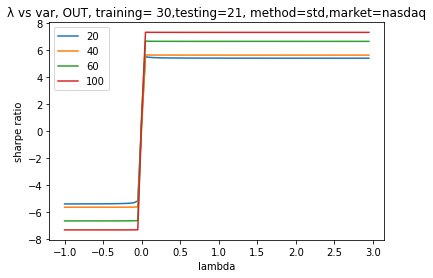

In [14]:
size_list = [20,40,60,100]
for size in size_list:

    in_sample_return_matrix_list, out_sample_return_matrix_list, random_date_list = generate_random_list(return_rate_matrix, model_input, training_window_list, testing_window_list, num_iter=num_iter,sample_size=size)
    for method in method_list:
        for testing_window in testing_window_list:
            sum_var = []
            sum_ret = []
            for training_window in training_window_list:
                variance_list_sum_mfcf_for_different_clique,return_list_sum_mfcf_for_different_clique=[],[]
                for max_clique_size in max_clique_size_list:
                    ct_control['max_clique_size'] = max_clique_size
                    print(ct_control['max_clique_size'])
                    # example process
                    variance_list_sum_mfcf,return_list_sum_mfcf = mfcf_test(random_date_list,in_sample_return_matrix_list, 
                                                                        out_sample_return_matrix_list,
                                                                        model_input,iteration_range_mfcf,
                                                                        ct_control=ct_control,training_window =training_window, 
                                                                        testing_window=testing_window,given_return=False,in_sample=False,method=method)
                    variance_list_sum_mfcf_for_different_clique.append(variance_list_sum_mfcf)
                    return_list_sum_mfcf_for_different_clique.append(return_list_sum_mfcf)
                    print('=======================',max_clique_size)

                sum_var.append(variance_list_sum_mfcf_for_different_clique)
                sum_ret.append(return_list_sum_mfcf_for_different_clique)
                #final_result.append([variance_list_sum_mfcf_for_different_clique,return_list_sum_mfcf_for_different_clique])

            sum_var = np.array(sum_var)
            sum_ret = np.array(sum_ret)

            colors = plt.cm.viridis(np.linspace(0, 1, len(max_clique_size_list)))
            #lambda_range = np.arange(-0.05,0.05,0.002)
            lambda_range = iteration_range_mfcf # for small scale #100 points
            cliuqe_size_list = max_clique_size_list
            #def plotting_avg_lambda_sharpe(tw,sum_var,sum_ret,training_window_list= [150,250,300,500,1000],
            #lambda_range = np.arange(-0.05,0.05,0.001),cliuqe_size_list = [2,3,20,50],xlim=None,ylim=None):

            for tw in range(len(sum_var)):
                variance_list_sum_mfcf_for_different_clique, return_list_sum_mfcf_for_different_clique=sum_var[tw],sum_ret[tw]
                for i in range(len(variance_list_sum_mfcf_for_different_clique)):
                    variance_list_sum_ranged_mfcf = np.mean(variance_list_sum_mfcf_for_different_clique[i], axis=0)
                    return_list_sum_ranged_mfcf = np.mean(return_list_sum_mfcf_for_different_clique[i], axis=0)
                    sharpe_ratio_sum_ranged_mfcf = [return_list_sum_ranged_mfcf[j]/variance_list_sum_ranged_mfcf[j] for j in range(len(return_list_sum_ranged_mfcf))]
                    title = 'max clique size=%d'%cliuqe_size_list[i]
                    plt.plot(lambda_range,sharpe_ratio_sum_ranged_mfcf,label=size)
                title = 'λ vs var, OUT, training= %s,testing=%d, method=%s,market=nasdaq'% (training_window_list[tw],testing_window,method)
                plt.title(title)
                plt.xlabel('lambda')
                #plt.ylabel('return')
                plt.ylabel('sharpe ratio')
                plt.legend()
                #plt.savefig("%s/%s %s.png"%(directory_path,title,datetime.now().strftime("%Y%m%d_%H%M%S"))) # You can specify the format by changing the file extension (e.g., .pdf, .jpg, .svg)
                
            title = 'λ vs ret, out of sample_training size = %s,testing size=%d,method=%s'% (str(training_window_list),testing_window,method)
            #sum_ret.shape
            #directory_path = 'method=%s,λ vs SR,OUT, testing = %d'%(method,testing_window)
            #if not os.path.isdir(directory_path):
            #    os.makedirs(directory_path)
            # Flatten the 4D array to convert it into a 2D array
            flattened_array = sum_var.reshape(-1, sum_var.shape[-1])
            # Save the flattened array to a text file
            #np.savetxt('%s/%s sum_var %s.txt'%(directory_path,title,str(sum_var.shape)), flattened_array)
            # Flatten the 4D array to convert it into a 2D array
            flattened_array = sum_ret.reshape(-1, sum_ret.shape[-1])
            # Save the flattened array to a text file
            #np.savetxt('%s/%s sum_ret %s.txt'%(directory_path,title,str(sum_ret.shape)), flattened_array)
plt.show()

In [3]:
# load model
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
model_path = os.path.join(parent_dir, 'rf.sav')
loaded_model = pickle.load(open(model_path, 'rb'))
# load model input data
model_input_path = os.path.join(parent_dir, 'model_input_nasdaq.csv')
model_input = pd.read_csv(model_input_path)

In [7]:
symbol = 'CSCO'
predicting_base = model_input[model_input['Ticker']==symbol]
y_true = np.array(predicting_base['if_profit_21'].tolist())
predicting_base = predicting_base[['call_put_ratio_200',
                                                'SQZ',
                                                'MACD',
                                                'vix_fix_gauge',
                                                'Index',
                                                'Greater_than_MA125',
                                                'Ticker_label',
                                                'Close',
                                                'market_sum']]

In [8]:
y_pred = loaded_model.predict(predicting_base)

In [10]:
# method 2
y_pred = loaded_model.predict(predicting_base)
accuracy = accuracy_score(y_true, y_pred)
accuracy # =100%

0.983941605839416

In [11]:
# Calculate MCC
mcc = matthews_corrcoef(y_true, y_pred)
# Calculate F1 Score
f1 = f1_score(y_true, y_pred)

print(f'Matthews Correlation Coefficient: {mcc}')
print(f'F1 Score: {f1}')

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

TPR = cm[1, 1] / cm[1, :].sum()

print(f'True Positive Rate: {TPR}')

Matthews Correlation Coefficient: 0.9671882177820036
F1 Score: 0.9859872611464968


NameError: name 'confusion_matrix' is not defined